In [5]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import nltk
import string
string.punctuation
import re

In [6]:
df = pd.read_csv('/media/maruf/Entertainment/Data/scm_old/amazon1.csv')
df2 = pd.read_csv('/media/maruf/Entertainment/Data/scm_old/amazon2.csv')

In [7]:
df.columns

Index(['id', 'dateAdded', 'dateUpdated', 'name', 'asins', 'brand',
       'categories', 'primaryCategories', 'imageURLs', 'keys', 'manufacturer',
       'manufacturerNumber', 'reviews.date', 'reviews.dateAdded',
       'reviews.dateSeen', 'reviews.doRecommend', 'reviews.id',
       'reviews.numHelpful', 'reviews.rating', 'reviews.sourceURLs',
       'reviews.text', 'reviews.title', 'reviews.username', 'sourceURLs'],
      dtype='object')

In [8]:
print(df.columns)


Index(['id', 'dateAdded', 'dateUpdated', 'name', 'asins', 'brand',
       'categories', 'primaryCategories', 'imageURLs', 'keys', 'manufacturer',
       'manufacturerNumber', 'reviews.date', 'reviews.dateAdded',
       'reviews.dateSeen', 'reviews.doRecommend', 'reviews.id',
       'reviews.numHelpful', 'reviews.rating', 'reviews.sourceURLs',
       'reviews.text', 'reviews.title', 'reviews.username', 'sourceURLs'],
      dtype='object')


In [9]:
print(df.shape)
df

(5000, 24)


id             dateAdded           dateUpdated  \
0     AVqVGZNvQMlgsOJE6eUY  2017-03-03T16:56:05Z  2018-10-25T16:36:31Z   
1     AVqVGZNvQMlgsOJE6eUY  2017-03-03T16:56:05Z  2018-10-25T16:36:31Z   
2     AVqVGZNvQMlgsOJE6eUY  2017-03-03T16:56:05Z  2018-10-25T16:36:31Z   
3     AVqVGZNvQMlgsOJE6eUY  2017-03-03T16:56:05Z  2018-10-25T16:36:31Z   
4     AVqVGZNvQMlgsOJE6eUY  2017-03-03T16:56:05Z  2018-10-25T16:36:31Z   
...                    ...                   ...                   ...   
4995  AVqkIdZiv8e3D1O-leaJ  2017-03-06T14:59:25Z  2017-09-04T11:19:31Z   
4996  AVqkIdZiv8e3D1O-leaJ  2017-03-06T14:59:25Z  2017-09-04T11:19:31Z   
4997  AVqkIdZiv8e3D1O-leaJ  2017-03-06T14:59:25Z  2017-09-04T11:19:31Z   
4998  AVqkIdZiv8e3D1O-leaJ  2017-03-06T14:59:25Z  2017-09-04T11:19:31Z   
4999  AVqkIdZiv8e3D1O-leaJ  2017-03-06T14:59:25Z  2017-09-04T11:19:31Z   

                                                   name       asins   brand  \
0     Amazon Kindle E-Reader 6" Wifi (8th Generation...  B00ZV9PXP2  Amazon   
1     Amazon Kindle E-Reader 6" Wifi (8th Generation...  B00ZV9PXP2  Amazon   
2     Amazon Kindle E-Reader 6" Wifi (8th Generation...  B00ZV9PXP2  Amazon   
3     Amazon Kindle E-Reader 6" Wifi (8th Generation...  B00ZV9PXP2  Amazon   
4     Amazon Kindle E-Reader 6" Wifi (8th Generation...  B00ZV9PXP2  Amazon   
...                                                 ...         ...     ...   
4995  Fire Tablet with Alexa, 7" Display, 16 GB, Mag...  B018Y224PY  Amazon   
4996  Fire Tablet with Alexa, 7" Display, 16 GB, Mag...  B018Y224PY  Amazon   
4997  Fire Tablet with Alexa, 7" Display, 16 GB, Mag...  B018Y224PY  Amazon   
4998  Fire Tablet with Alexa, 7" Display, 16 GB, Mag...  B018Y224PY  Amazon   
4999  Fire Tablet with Alexa, 7" Display, 16 GB, Mag...  B018Y224PY  Amazon   

                                             categories primaryCategories  \
0     Computers,Electronics Features,Tablets,Electro...       Electronics   
1     Computers,Electronics Features,Tablets,Electro...       Electronics   
2     Computers,Electronics Features,Tablets,Electro...       Electronics   
3     Computers,Electronics Features,Tablets,Electro...       Electronics   
4     Computers,Electronics Features,Tablets,Electro...       Electronics   
...                                                 ...               ...   
4995  Tablets,Fire Tablets,Electronics,iPad & Tablet...       Electronics   
4996  Tablets,Fire Tablets,Electronics,iPad & Tablet...       Electronics   
4997  Tablets,Fire Tablets,Electronics,iPad & Tablet...       Electronics   
4998  Tablets,Fire Tablets,Electronics,iPad & Tablet...       Electronics   
4999  Tablets,Fire Tablets,Electronics,iPad & Tablet...       Electronics   

                                              imageURLs  \
0     https://pisces.bbystatic.com/image2/BestBuy_US...   
1     https://pisces.bbystatic.com/image2/BestBuy_US...   
2     https://pisces.bbystatic.com/image2/BestBuy_US...   
3     https://pisces.bbystatic.com/image2/BestBuy_US...   
4     https://pisces.bbystatic.com/image2/BestBuy_US...   
...                                                 ...   
4995  https://images-na.ssl-images-amazon.com/images...   
4996  https://images-na.ssl-images-amazon.com/images...   
4997  https://images-na.ssl-images-amazon.com/images...   
4998  https://images-na.ssl-images-amazon.com/images...   
4999  https://images-na.ssl-images-amazon.com/images...   

                                                   keys  ...  \
0     allnewkindleereaderblack6glarefreetouchscreend...  ...   
1     allnewkindleereaderblack6glarefreetouchscreend...  ...   
2     allnewkindleereaderblack6glarefreetouchscreend...  ...   
3     allnewkindleereaderblack6glarefreetouchscreend...  ...   
4     allnewkindleereaderblack6glarefreetouchscreend...  ...   
...                                                 ...  ...   
4995  841667103150,0841667103150,firetabletwithalexa...  ...   
4996  841667103150,0841667103150,firetab

In [10]:
print(df2.shape)
df2


(28332, 24)


id             dateAdded           dateUpdated  \
0      AVpgNzjwLJeJML43Kpxn  2015-10-30T08:59:32Z  2019-04-25T09:08:16Z   
1      AVpgNzjwLJeJML43Kpxn  2015-10-30T08:59:32Z  2019-04-25T09:08:16Z   
2      AVpgNzjwLJeJML43Kpxn  2015-10-30T08:59:32Z  2019-04-25T09:08:16Z   
3      AVpgNzjwLJeJML43Kpxn  2015-10-30T08:59:32Z  2019-04-25T09:08:16Z   
4      AVpgNzjwLJeJML43Kpxn  2015-10-30T08:59:32Z  2019-04-25T09:08:16Z   
...                     ...                   ...                   ...   
28327  AVqkIhxunnc1JgDc3kg_  2017-03-06T14:59:43Z  2019-02-23T02:49:38Z   
28328  AVqkIhxunnc1JgDc3kg_  2017-03-06T14:59:43Z  2019-02-23T02:49:38Z   
28329  AVqkIhxunnc1JgDc3kg_  2017-03-06T14:59:43Z  2019-02-23T02:49:38Z   
28330  AVqkIhxunnc1JgDc3kg_  2017-03-06T14:59:43Z  2019-02-23T02:49:38Z   
28331  AVqkIhxunnc1JgDc3kg_  2017-03-06T14:59:43Z  2019-02-23T02:49:38Z   

                                                    name  \
0      AmazonBasics AAA Performance Alkaline Batterie...   
1      AmazonBasics AAA Performance Alkaline Batterie...   
2      AmazonBasics AAA Performance Alkaline Batterie...   
3      AmazonBasics AAA Performance Alkaline Batterie...   
4      AmazonBasics AAA Performance Alkaline Batterie...   
...                                                  ...   
28327  Fire HD 8 Tablet with Alexa, 8 HD Display, 16 ...   
28328  Fire HD 8 Tablet with Alexa, 8 HD Display, 16 ...   
28329  Fire HD 8 Tablet with Alexa, 8 HD Display, 16 ...   
28330  Fire HD 8 Tablet with Alexa, 8 HD Display, 16 ...   
28331  Fire HD 8 Tablet with Alexa, 8 HD Display, 16 ...   

                       asins         brand  \
0      B00QWO9P0O,B00LH3DMUO  Amazonbasics   
1      B00QWO9P0O,B00LH3DMUO  Amazonbasics   
2      B00QWO9P0O,B00LH3DMUO  Amazonbasics   
3      B00QWO9P0O,B00LH3DMUO  Amazonbasics   
4      B00QWO9P0O,B00LH3DMUO  Amazonbasics   
...                      ...           ...   
28327             B018T075DC        Amazon   
28328             B018T075DC        Amazon   
28329             B018T075DC        Amazon   
28330             B018T075DC        Amazon   
28331             B018T075DC        Amazon   

                                              categories primaryCategories  \
0      AA,AAA,Health,Electronics,Health & Household,C...   Health & Beauty   
1      AA,AAA,Health,Electronics,Health & Household,C...   Health & Beauty   
2      AA,AAA,Health,Electronics,Health & Household,C...   Health & Beauty   
3      AA,AAA,Health,Electronics,Health & Household,C...   Health & Beauty   
4      AA,AAA,Health,Electronics,Health & Household,C...   Health & Beauty   
...                                                  ...               ...   
28327  Fire Tablets,Tablets,All Tablets,Amazon Tablet...       Electronics   
28328  Fire Tablets,Tablets,All Tablets,Amazon Tablet...       Electronics   
28329  Fire Tablets,Tablets,All Tablets,Amazon Tablet...       Electronics   
28330  Fire Tablets,Tablets,All Tablets,Amazon Tablet...       Electronics   
28331  Fire Tablets,Tablets,All Tablets,Amazon Tablet...       Electronics   

                                               imageURLs  \
0      https://images-na.ssl-images-amazon.com/images...   
1      https://images-na.ssl-images-amazon.com/images...   
2      https://images-na.ssl-images-amazon.com/images...   
3      https://images-na.ssl-images-amazon.com/images...   
4      https://images-na.ssl-images-amazon.com/images...   
...                                                  ...   
28327  https://www.upccodesearch.com/images/barcode/0...   
28328  https://www.upccodesearch.com/images/barcode/0...   
28329  https://www.upccodesearch.com/images/barcode/0...   
28330  https://www.upccodesearch.com/images/barcode/0...   
28331  https://www.upccodesearch.com/images/barcode/0...   

                                                    keys  ...  \
0      amazonbasics/hl002619,amazonbasicsaaaperforman...  ...   
1      amazonbasics/hl002619,amazonbasicsaaaperforman...  ... 

In [11]:
import datacompy

compareCSV = datacompy.Compare(df,df2,join_columns='id')
print(compareCSV.report())

DataComPy Comparison
--------------------

DataFrame Summary
-----------------

  DataFrame  Columns   Rows
0       df1       24   5000
1       df2       24  28332

Column Summary
--------------

Number of columns in common: 23
Number of columns in df1 but not in df2: 1
Number of columns in df2 but not in df1: 1

Row Summary
-----------

Matched on: id
Any duplicates on match values: Yes
Absolute Tolerance: 0
Relative Tolerance: 0
Number of rows in common: 2,679
Number of rows in df1 but not in df2: 2,321
Number of rows in df2 but not in df1: 25,653

Number of rows with some compared columns unequal: 2,679
Number of rows with all compared columns equal: 0

Column Comparison
-----------------

Number of columns compared with some values unequal: 19
Number of columns compared with all values equal: 4
Total number of values which compare unequal: 28,996

Columns with Unequal Values or Types
------------------------------------

                 Column df1 dtype df2 dtype  # Unequal  Max D

In [12]:
df.columns

Index(['id', 'dateadded', 'dateupdated', 'name', 'asins', 'brand',
       'categories', 'primarycategories', 'imageurls', 'keys', 'manufacturer',
       'manufacturernumber', 'reviews.date', 'reviews.dateadded',
       'reviews.dateseen', 'reviews.dorecommend', 'reviews.id',
       'reviews.numhelpful', 'reviews.rating', 'reviews.sourceurls',
       'reviews.text', 'reviews.title', 'reviews.username', 'sourceurls'],
      dtype='object')

In [13]:
data1 = df.drop(['asins', 'imageurls', 'keys','reviews.dateseen', 'reviews.sourceurls', 'sourceurls'], axis= 1)

In [14]:
print(data1.shape)
data1.head(5)

(5000, 18)


id             dateadded           dateupdated  \
0  AVqVGZNvQMlgsOJE6eUY  2017-03-03T16:56:05Z  2018-10-25T16:36:31Z   
1  AVqVGZNvQMlgsOJE6eUY  2017-03-03T16:56:05Z  2018-10-25T16:36:31Z   
2  AVqVGZNvQMlgsOJE6eUY  2017-03-03T16:56:05Z  2018-10-25T16:36:31Z   
3  AVqVGZNvQMlgsOJE6eUY  2017-03-03T16:56:05Z  2018-10-25T16:36:31Z   
4  AVqVGZNvQMlgsOJE6eUY  2017-03-03T16:56:05Z  2018-10-25T16:36:31Z   

                                                name   brand  \
0  Amazon Kindle E-Reader 6" Wifi (8th Generation...  Amazon   
1  Amazon Kindle E-Reader 6" Wifi (8th Generation...  Amazon   
2  Amazon Kindle E-Reader 6" Wifi (8th Generation...  Amazon   
3  Amazon Kindle E-Reader 6" Wifi (8th Generation...  Amazon   
4  Amazon Kindle E-Reader 6" Wifi (8th Generation...  Amazon   

                                          categories primarycategories  \
0  Computers,Electronics Features,Tablets,Electro...       Electronics   
1  Computers,Electronics Features,Tablets,Electro...       Electronics   
2  Computers,Electronics Features,Tablets,Electro...       Electronics   
3  Computers,Electronics Features,Tablets,Electro...       Electronics   
4  Computers,Electronics Features,Tablets,Electro...       Electronics   

  manufacturer manufacturernumber              reviews.date reviews.dateadded  \
0       Amazon         B00ZV9PXP2  2017-09-03T00:00:00.000Z               NaN   
1       Amazon         B00ZV9PXP2  2017-06-06T00:00:00.000Z               NaN   
2       Amazon         B00ZV9PXP2  2018-04-20T00:00:00.000Z               NaN   
3       Amazon         B00ZV9PXP2  2017-11-02T17:33:31.000Z               NaN   
4       Amazon         B00ZV9PXP2  2018-04-24T00:00:00.000Z               NaN   

   reviews.dorecommend   reviews.id  reviews.numhelpful  reviews.rating  \
0                False          NaN                   0               3   
1                 True          NaN                   0               5   
2                 True          NaN                   0               4   
3                 True  177283626.0                   3               5   
4                 True          NaN                   0               5   

                                        reviews.text  \
0  I thought it would be as big as small paper bu...   
1  This kindle is light and easy to use especiall...   
2  Didnt know how much i'd use a kindle so went f...   
3  I am 100 happy with my purchase. I caught it o...   
4  Solid entry level Kindle. Great for kids. Gift...   

                                  reviews.title reviews.username  
0                                     Too small           llyyue  
1  Great light reader. Easy to use at the beach           Charmi  
2                           Great for the price     johnnyjojojo  
3                                   A Great Buy          Kdperry  
4      Solid entry-level Kindle. Great for kids      Johnnyblack

In [15]:
df2.columns

Index(['id', 'dateadded', 'dateupdated', 'name', 'asins', 'brand',
       'categories', 'primarycategories', 'imageurls', 'keys', 'manufacturer',
       'manufacturernumber', 'reviews.date', 'reviews.dateseen',
       'reviews.didpurchase', 'reviews.dorecommend', 'reviews.id',
       'reviews.numhelpful', 'reviews.rating', 'reviews.sourceurls',
       'reviews.text', 'reviews.title', 'reviews.username', 'sourceurls'],
      dtype='object')

In [16]:
data2 = df2.drop(['asins', 'imageurls', 'keys',  'reviews.didpurchase', 'reviews.sourceurls', 'sourceurls'], axis= 1)

In [17]:
print(data2.shape)
data2.head(5)

(28332, 18)


id             dateadded           dateupdated  \
0  AVpgNzjwLJeJML43Kpxn  2015-10-30T08:59:32Z  2019-04-25T09:08:16Z   
1  AVpgNzjwLJeJML43Kpxn  2015-10-30T08:59:32Z  2019-04-25T09:08:16Z   
2  AVpgNzjwLJeJML43Kpxn  2015-10-30T08:59:32Z  2019-04-25T09:08:16Z   
3  AVpgNzjwLJeJML43Kpxn  2015-10-30T08:59:32Z  2019-04-25T09:08:16Z   
4  AVpgNzjwLJeJML43Kpxn  2015-10-30T08:59:32Z  2019-04-25T09:08:16Z   

                                                name         brand  \
0  AmazonBasics AAA Performance Alkaline Batterie...  Amazonbasics   
1  AmazonBasics AAA Performance Alkaline Batterie...  Amazonbasics   
2  AmazonBasics AAA Performance Alkaline Batterie...  Amazonbasics   
3  AmazonBasics AAA Performance Alkaline Batterie...  Amazonbasics   
4  AmazonBasics AAA Performance Alkaline Batterie...  Amazonbasics   

                                          categories primarycategories  \
0  AA,AAA,Health,Electronics,Health & Household,C...   Health & Beauty   
1  AA,AAA,Health,Electronics,Health & Household,C...   Health & Beauty   
2  AA,AAA,Health,Electronics,Health & Household,C...   Health & Beauty   
3  AA,AAA,Health,Electronics,Health & Household,C...   Health & Beauty   
4  AA,AAA,Health,Electronics,Health & Household,C...   Health & Beauty   

   manufacturer manufacturernumber              reviews.date  \
0  AmazonBasics          HL-002619  2017-03-02T00:00:00.000Z   
1  AmazonBasics          HL-002619  2016-08-31T00:00:00.000Z   
2  AmazonBasics          HL-002619  2016-12-06T00:00:00.000Z   
3  AmazonBasics          HL-002619  2016-03-28T00:00:00.000Z   
4  AmazonBasics          HL-002619  2017-04-22T00:00:00.000Z   

       reviews.dateseen reviews.dorecommend  reviews.id  reviews.numhelpful  \
0  2017-08-28T00:00:00Z                 NaN         NaN                 NaN   
1  2017-08-28T00:00:00Z                 NaN         NaN                 NaN   
2  2017-08-28T00:00:00Z                 NaN         NaN                 NaN   
3  2017-08-28T00:00:00Z                 NaN         NaN                 NaN   
4  2017-08-28T00:00:00Z                 NaN         NaN                 NaN   

   reviews.rating                                       reviews.text  \
0               3  I order 3 of them and one of the item is bad q...   
1               4  Bulk is always the less expensive way to go fo...   
2               5  Well they are not Duracell but for the price i...   
3               5  Seem to work as well as name brand batteries a...   
4               5  These batteries are very long lasting the pric...   

                                       reviews.title  reviews.username  
0  ... 3 of them and one of the item is bad quali...        Byger yang  
1  ... always the less expensive way to go for pr...              ByMG  
2  ... are not Duracell but for the price i am ha...  BySharon Lambert  
3  ... as well as name brand batteries at a much ...     Bymark sexson  
4  ... batteries are very long lasting the price ...           Bylinda

In [18]:
import datacompy

compareCSV = datacompy.Compare(data1,data2,join_columns='id')
print(compareCSV.report())

DataComPy Comparison
--------------------

DataFrame Summary
-----------------

  DataFrame  Columns   Rows
0       df1       18   5000
1       df2       18  28332

Column Summary
--------------

Number of columns in common: 17
Number of columns in df1 but not in df2: 1
Number of columns in df2 but not in df1: 1

Row Summary
-----------

Matched on: id
Any duplicates on match values: Yes
Absolute Tolerance: 0
Relative Tolerance: 0
Number of rows in common: 2,679
Number of rows in df1 but not in df2: 2,321
Number of rows in df2 but not in df1: 25,653

Number of rows with some compared columns unequal: 2,679
Number of rows with all compared columns equal: 0

Column Comparison
-----------------

Number of columns compared with some values unequal: 13
Number of columns compared with all values equal: 4
Total number of values which compare unequal: 18,399

Columns with Unequal Values or Types
------------------------------------

                 Column df1 dtype df2 dtype  # Unequal  Max D

In [19]:
data1.columns

Index(['id', 'dateadded', 'dateupdated', 'name', 'brand', 'categories',
       'primarycategories', 'manufacturer', 'manufacturernumber',
       'reviews.date', 'reviews.dateadded', 'reviews.dorecommend',
       'reviews.id', 'reviews.numhelpful', 'reviews.rating', 'reviews.text',
       'reviews.title', 'reviews.username'],
      dtype='object')

In [20]:
data1.drop(['reviews.dateadded'], axis= 1)

id             dateadded           dateupdated  \
0     AVqVGZNvQMlgsOJE6eUY  2017-03-03T16:56:05Z  2018-10-25T16:36:31Z   
1     AVqVGZNvQMlgsOJE6eUY  2017-03-03T16:56:05Z  2018-10-25T16:36:31Z   
2     AVqVGZNvQMlgsOJE6eUY  2017-03-03T16:56:05Z  2018-10-25T16:36:31Z   
3     AVqVGZNvQMlgsOJE6eUY  2017-03-03T16:56:05Z  2018-10-25T16:36:31Z   
4     AVqVGZNvQMlgsOJE6eUY  2017-03-03T16:56:05Z  2018-10-25T16:36:31Z   
...                    ...                   ...                   ...   
4995  AVqkIdZiv8e3D1O-leaJ  2017-03-06T14:59:25Z  2017-09-04T11:19:31Z   
4996  AVqkIdZiv8e3D1O-leaJ  2017-03-06T14:59:25Z  2017-09-04T11:19:31Z   
4997  AVqkIdZiv8e3D1O-leaJ  2017-03-06T14:59:25Z  2017-09-04T11:19:31Z   
4998  AVqkIdZiv8e3D1O-leaJ  2017-03-06T14:59:25Z  2017-09-04T11:19:31Z   
4999  AVqkIdZiv8e3D1O-leaJ  2017-03-06T14:59:25Z  2017-09-04T11:19:31Z   

                                                   name   brand  \
0     Amazon Kindle E-Reader 6" Wifi (8th Generation...  Amazon   
1     Amazon Kindle E-Reader 6" Wifi (8th Generation...  Amazon   
2     Amazon Kindle E-Reader 6" Wifi (8th Generation...  Amazon   
3     Amazon Kindle E-Reader 6" Wifi (8th Generation...  Amazon   
4     Amazon Kindle E-Reader 6" Wifi (8th Generation...  Amazon   
...                                                 ...     ...   
4995  Fire Tablet with Alexa, 7" Display, 16 GB, Mag...  Amazon   
4996  Fire Tablet with Alexa, 7" Display, 16 GB, Mag...  Amazon   
4997  Fire Tablet with Alexa, 7" Display, 16 GB, Mag...  Amazon   
4998  Fire Tablet with Alexa, 7" Display, 16 GB, Mag...  Amazon   
4999  Fire Tablet with Alexa, 7" Display, 16 GB, Mag...  Amazon   

                                             categories primarycategories  \
0     Computers,Electronics Features,Tablets,Electro...       Electronics   
1     Computers,Electronics Features,Tablets,Electro...       Electronics   
2     Computers,Electronics Features,Tablets,Electro...       Electronics   
3     Computers,Electronics Features,Tablets,Electro...       Electronics   
4     Computers,Electronics Features,Tablets,Electro...       Electronics   
...                                                 ...               ...   
4995  Tablets,Fire Tablets,Electronics,iPad & Tablet...       Electronics   
4996  Tablets,Fire Tablets,Electronics,iPad & Tablet...       Electronics   
4997  Tablets,Fire Tablets,Electronics,iPad & Tablet...       Electronics   
4998  Tablets,Fire Tablets,Electronics,iPad & Tablet...       Electronics   
4999  Tablets,Fire Tablets,Electronics,iPad & Tablet...       Electronics   

     manufacturer manufacturernumber              reviews.date  \
0          Amazon         B00ZV9PXP2  2017-09-03T00:00:00.000Z   
1          Amazon         B00ZV9PXP2  2017-06-06T00:00:00.000Z   
2          Amazon         B00ZV9PXP2  2018-04-20T00:00:00.000Z   
3          Amazon         B00ZV9PXP2  2017-11-02T17:33:31.000Z   
4          Amazon         B00ZV9PXP2  2018-04-24T00:00:00.000Z   
...           ...                ...                       ...   
4995       Amazon         B018Y224PY  2016-10-21T00:00:00.000Z   
4996       Amazon         B018Y224PY  2016-08-10T00:00:00.000Z   
4997       Amazon         B018Y224PY  2016-06-05T00:00:00.000Z   
4998       Amazon         B018Y224PY  2016-09-02T00:00:00.000Z   
4999       Amazon         B018Y224PY  2016-05-19T00:00:00.000Z   

      reviews.dorecommend   reviews.id  reviews.numhelpful  reviews.rating  \
0                   False          NaN                   0               3   
1                    True          NaN                   0               5   
2                    True          NaN                   0               4   
3                    True  177283626.0                   3               5   
4                    True          NaN                   0               5   
...                   ...          ...                 ...             ...   
4995                 True          NaN                   0        

In [21]:
data2.columns

Index(['id', 'dateadded', 'dateupdated', 'name', 'brand', 'categories',
       'primarycategories', 'manufacturer', 'manufacturernumber',
       'reviews.date', 'reviews.dateseen', 'reviews.dorecommend', 'reviews.id',
       'reviews.numhelpful', 'reviews.rating', 'reviews.text', 'reviews.title',
       'reviews.username'],
      dtype='object')

In [22]:
data2.drop(['reviews.dateseen'],axis=1)

id             dateadded           dateupdated  \
0      AVpgNzjwLJeJML43Kpxn  2015-10-30T08:59:32Z  2019-04-25T09:08:16Z   
1      AVpgNzjwLJeJML43Kpxn  2015-10-30T08:59:32Z  2019-04-25T09:08:16Z   
2      AVpgNzjwLJeJML43Kpxn  2015-10-30T08:59:32Z  2019-04-25T09:08:16Z   
3      AVpgNzjwLJeJML43Kpxn  2015-10-30T08:59:32Z  2019-04-25T09:08:16Z   
4      AVpgNzjwLJeJML43Kpxn  2015-10-30T08:59:32Z  2019-04-25T09:08:16Z   
...                     ...                   ...                   ...   
28327  AVqkIhxunnc1JgDc3kg_  2017-03-06T14:59:43Z  2019-02-23T02:49:38Z   
28328  AVqkIhxunnc1JgDc3kg_  2017-03-06T14:59:43Z  2019-02-23T02:49:38Z   
28329  AVqkIhxunnc1JgDc3kg_  2017-03-06T14:59:43Z  2019-02-23T02:49:38Z   
28330  AVqkIhxunnc1JgDc3kg_  2017-03-06T14:59:43Z  2019-02-23T02:49:38Z   
28331  AVqkIhxunnc1JgDc3kg_  2017-03-06T14:59:43Z  2019-02-23T02:49:38Z   

                                                    name         brand  \
0      AmazonBasics AAA Performance Alkaline Batterie...  Amazonbasics   
1      AmazonBasics AAA Performance Alkaline Batterie...  Amazonbasics   
2      AmazonBasics AAA Performance Alkaline Batterie...  Amazonbasics   
3      AmazonBasics AAA Performance Alkaline Batterie...  Amazonbasics   
4      AmazonBasics AAA Performance Alkaline Batterie...  Amazonbasics   
...                                                  ...           ...   
28327  Fire HD 8 Tablet with Alexa, 8 HD Display, 16 ...        Amazon   
28328  Fire HD 8 Tablet with Alexa, 8 HD Display, 16 ...        Amazon   
28329  Fire HD 8 Tablet with Alexa, 8 HD Display, 16 ...        Amazon   
28330  Fire HD 8 Tablet with Alexa, 8 HD Display, 16 ...        Amazon   
28331  Fire HD 8 Tablet with Alexa, 8 HD Display, 16 ...        Amazon   

                                              categories primarycategories  \
0      AA,AAA,Health,Electronics,Health & Household,C...   Health & Beauty   
1      AA,AAA,Health,Electronics,Health & Household,C...   Health & Beauty   
2      AA,AAA,Health,Electronics,Health & Household,C...   Health & Beauty   
3      AA,AAA,Health,Electronics,Health & Household,C...   Health & Beauty   
4      AA,AAA,Health,Electronics,Health & Household,C...   Health & Beauty   
...                                                  ...               ...   
28327  Fire Tablets,Tablets,All Tablets,Amazon Tablet...       Electronics   
28328  Fire Tablets,Tablets,All Tablets,Amazon Tablet...       Electronics   
28329  Fire Tablets,Tablets,All Tablets,Amazon Tablet...       Electronics   
28330  Fire Tablets,Tablets,All Tablets,Amazon Tablet...       Electronics   
28331  Fire Tablets,Tablets,All Tablets,Amazon Tablet...       Electronics   

       manufacturer manufacturernumber              reviews.date  \
0      AmazonBasics          HL-002619  2017-03-02T00:00:00.000Z   
1      AmazonBasics          HL-002619  2016-08-31T00:00:00.000Z   
2      AmazonBasics          HL-002619  2016-12-06T00:00:00.000Z   
3      AmazonBasics          HL-002619  2016-03-28T00:00:00.000Z   
4      AmazonBasics          HL-002619  2017-04-22T00:00:00.000Z   
...             ...                ...                       ...   
28327        Amazon          53-004485  2016-12-07T00:00:00.000Z   
28328        Amazon          53-004485  2017-01-20T00:00:00.000Z   
28329        Amazon          53-004485  2017-01-30T00:00:00.000Z   
28330        Amazon          53-004485  2017-02-17T00:00:00.000Z   
28331        Amazon          53-004485  2016-12-23T00:00:00.000Z   

      reviews.dorecommend  reviews.id  reviews.numhelpful  reviews.rating  \
0                     NaN         NaN                 NaN               3   
1                     NaN         NaN                 NaN               4   
2                     NaN         NaN                 NaN               5   
3                     NaN         NaN                 NaN               5   
4                     NaN         NaN                 NaN               5   
...                

In [23]:
import datacompy

compareCSV2 = datacompy.Compare(data1,data2,join_columns='id')
print(compareCSV2.report())

DataComPy Comparison
--------------------

DataFrame Summary
-----------------

  DataFrame  Columns   Rows
0       df1       18   5000
1       df2       18  28332

Column Summary
--------------

Number of columns in common: 17
Number of columns in df1 but not in df2: 1
Number of columns in df2 but not in df1: 1

Row Summary
-----------

Matched on: id
Any duplicates on match values: Yes
Absolute Tolerance: 0
Relative Tolerance: 0
Number of rows in common: 2,679
Number of rows in df1 but not in df2: 2,321
Number of rows in df2 but not in df1: 25,653

Number of rows with some compared columns unequal: 2,679
Number of rows with all compared columns equal: 0

Column Comparison
-----------------

Number of columns compared with some values unequal: 13
Number of columns compared with all values equal: 4
Total number of values which compare unequal: 18,399

Columns with Unequal Values or Types
------------------------------------

                 Column df1 dtype df2 dtype  # Unequal  Max D

In [24]:
data1.columns

Index(['id', 'dateadded', 'dateupdated', 'name', 'brand', 'categories',
       'primarycategories', 'manufacturer', 'manufacturernumber',
       'reviews.date', 'reviews.dateadded', 'reviews.dorecommend',
       'reviews.id', 'reviews.numhelpful', 'reviews.rating', 'reviews.text',
       'reviews.title', 'reviews.username'],
      dtype='object')

In [25]:
data1_CSV = data1.drop(['reviews.dateadded'], axis=1)

In [26]:
data1_CSV.columns

Index(['id', 'dateadded', 'dateupdated', 'name', 'brand', 'categories',
       'primarycategories', 'manufacturer', 'manufacturernumber',
       'reviews.date', 'reviews.dorecommend', 'reviews.id',
       'reviews.numhelpful', 'reviews.rating', 'reviews.text', 'reviews.title',
       'reviews.username'],
      dtype='object')

In [27]:
data2.columns

Index(['id', 'dateadded', 'dateupdated', 'name', 'brand', 'categories',
       'primarycategories', 'manufacturer', 'manufacturernumber',
       'reviews.date', 'reviews.dateseen', 'reviews.dorecommend', 'reviews.id',
       'reviews.numhelpful', 'reviews.rating', 'reviews.text', 'reviews.title',
       'reviews.username'],
      dtype='object')

In [28]:
data2_CSV = data2.drop(['reviews.dateseen'], axis=1)

In [29]:
data2_CSV.columns

Index(['id', 'dateadded', 'dateupdated', 'name', 'brand', 'categories',
       'primarycategories', 'manufacturer', 'manufacturernumber',
       'reviews.date', 'reviews.dorecommend', 'reviews.id',
       'reviews.numhelpful', 'reviews.rating', 'reviews.text', 'reviews.title',
       'reviews.username'],
      dtype='object')

In [30]:
data = pd.merge(data1_CSV, data2_CSV)
data.head(5)

Empty DataFrame
Columns: [id, dateadded, dateupdated, name, brand, categories, primarycategories, manufacturer, manufacturernumber, reviews.date, reviews.dorecommend, reviews.id, reviews.numhelpful, reviews.rating, reviews.text, reviews.title, reviews.username]
Index: []

In [31]:
print(data.shape)
data.head(100)

(0, 17)


Empty DataFrame
Columns: [id, dateadded, dateupdated, name, brand, categories, primarycategories, manufacturer, manufacturernumber, reviews.date, reviews.dorecommend, reviews.id, reviews.numhelpful, reviews.rating, reviews.text, reviews.title, reviews.username]
Index: []

In [32]:
print(data1_CSV.shape)
data1_CSV.head(5)

(5000, 17)


id             dateadded           dateupdated  \
0  AVqVGZNvQMlgsOJE6eUY  2017-03-03T16:56:05Z  2018-10-25T16:36:31Z   
1  AVqVGZNvQMlgsOJE6eUY  2017-03-03T16:56:05Z  2018-10-25T16:36:31Z   
2  AVqVGZNvQMlgsOJE6eUY  2017-03-03T16:56:05Z  2018-10-25T16:36:31Z   
3  AVqVGZNvQMlgsOJE6eUY  2017-03-03T16:56:05Z  2018-10-25T16:36:31Z   
4  AVqVGZNvQMlgsOJE6eUY  2017-03-03T16:56:05Z  2018-10-25T16:36:31Z   

                                                name   brand  \
0  Amazon Kindle E-Reader 6" Wifi (8th Generation...  Amazon   
1  Amazon Kindle E-Reader 6" Wifi (8th Generation...  Amazon   
2  Amazon Kindle E-Reader 6" Wifi (8th Generation...  Amazon   
3  Amazon Kindle E-Reader 6" Wifi (8th Generation...  Amazon   
4  Amazon Kindle E-Reader 6" Wifi (8th Generation...  Amazon   

                                          categories primarycategories  \
0  Computers,Electronics Features,Tablets,Electro...       Electronics   
1  Computers,Electronics Features,Tablets,Electro...       Electronics   
2  Computers,Electronics Features,Tablets,Electro...       Electronics   
3  Computers,Electronics Features,Tablets,Electro...       Electronics   
4  Computers,Electronics Features,Tablets,Electro...       Electronics   

  manufacturer manufacturernumber              reviews.date  \
0       Amazon         B00ZV9PXP2  2017-09-03T00:00:00.000Z   
1       Amazon         B00ZV9PXP2  2017-06-06T00:00:00.000Z   
2       Amazon         B00ZV9PXP2  2018-04-20T00:00:00.000Z   
3       Amazon         B00ZV9PXP2  2017-11-02T17:33:31.000Z   
4       Amazon         B00ZV9PXP2  2018-04-24T00:00:00.000Z   

   reviews.dorecommend   reviews.id  reviews.numhelpful  reviews.rating  \
0                False          NaN                   0               3   
1                 True          NaN                   0               5   
2                 True          NaN                   0               4   
3                 True  177283626.0                   3               5   
4                 True          NaN                   0               5   

                                        reviews.text  \
0  I thought it would be as big as small paper bu...   
1  This kindle is light and easy to use especiall...   
2  Didnt know how much i'd use a kindle so went f...   
3  I am 100 happy with my purchase. I caught it o...   
4  Solid entry level Kindle. Great for kids. Gift...   

                                  reviews.title reviews.username  
0                                     Too small           llyyue  
1  Great light reader. Easy to use at the beach           Charmi  
2                           Great for the price     johnnyjojojo  
3                                   A Great Buy          Kdperry  
4      Solid entry-level Kindle. Great for kids      Johnnyblack

In [33]:
data1_CSV.to_csv('scm1_data.csv', index=False)

In [34]:
print(data2_CSV.shape)
data2_CSV.head(5)

(28332, 17)


id             dateadded           dateupdated  \
0  AVpgNzjwLJeJML43Kpxn  2015-10-30T08:59:32Z  2019-04-25T09:08:16Z   
1  AVpgNzjwLJeJML43Kpxn  2015-10-30T08:59:32Z  2019-04-25T09:08:16Z   
2  AVpgNzjwLJeJML43Kpxn  2015-10-30T08:59:32Z  2019-04-25T09:08:16Z   
3  AVpgNzjwLJeJML43Kpxn  2015-10-30T08:59:32Z  2019-04-25T09:08:16Z   
4  AVpgNzjwLJeJML43Kpxn  2015-10-30T08:59:32Z  2019-04-25T09:08:16Z   

                                                name         brand  \
0  AmazonBasics AAA Performance Alkaline Batterie...  Amazonbasics   
1  AmazonBasics AAA Performance Alkaline Batterie...  Amazonbasics   
2  AmazonBasics AAA Performance Alkaline Batterie...  Amazonbasics   
3  AmazonBasics AAA Performance Alkaline Batterie...  Amazonbasics   
4  AmazonBasics AAA Performance Alkaline Batterie...  Amazonbasics   

                                          categories primarycategories  \
0  AA,AAA,Health,Electronics,Health & Household,C...   Health & Beauty   
1  AA,AAA,Health,Electronics,Health & Household,C...   Health & Beauty   
2  AA,AAA,Health,Electronics,Health & Household,C...   Health & Beauty   
3  AA,AAA,Health,Electronics,Health & Household,C...   Health & Beauty   
4  AA,AAA,Health,Electronics,Health & Household,C...   Health & Beauty   

   manufacturer manufacturernumber              reviews.date  \
0  AmazonBasics          HL-002619  2017-03-02T00:00:00.000Z   
1  AmazonBasics          HL-002619  2016-08-31T00:00:00.000Z   
2  AmazonBasics          HL-002619  2016-12-06T00:00:00.000Z   
3  AmazonBasics          HL-002619  2016-03-28T00:00:00.000Z   
4  AmazonBasics          HL-002619  2017-04-22T00:00:00.000Z   

  reviews.dorecommend  reviews.id  reviews.numhelpful  reviews.rating  \
0                 NaN         NaN                 NaN               3   
1                 NaN         NaN                 NaN               4   
2                 NaN         NaN                 NaN               5   
3                 NaN         NaN                 NaN               5   
4                 NaN         NaN                 NaN               5   

                                        reviews.text  \
0  I order 3 of them and one of the item is bad q...   
1  Bulk is always the less expensive way to go fo...   
2  Well they are not Duracell but for the price i...   
3  Seem to work as well as name brand batteries a...   
4  These batteries are very long lasting the pric...   

                                       reviews.title  reviews.username  
0  ... 3 of them and one of the item is bad quali...        Byger yang  
1  ... always the less expensive way to go for pr...              ByMG  
2  ... are not Duracell but for the price i am ha...  BySharon Lambert  
3  ... as well as name brand batteries at a much ...     Bymark sexson  
4  ... batteries are very long lasting the price ...           Bylinda

In [35]:
data2_CSV.to_csv('scm2_data.csv', index=False)

In [36]:
data = pd.concat(map(pd.read_csv, ['scm1_data.csv', 'scm2_data.csv']), ignore_index=True)
print(data)

                         id             dateadded           dateupdated  \
0      AVqVGZNvQMlgsOJE6eUY  2017-03-03T16:56:05Z  2018-10-25T16:36:31Z   
1      AVqVGZNvQMlgsOJE6eUY  2017-03-03T16:56:05Z  2018-10-25T16:36:31Z   
2      AVqVGZNvQMlgsOJE6eUY  2017-03-03T16:56:05Z  2018-10-25T16:36:31Z   
3      AVqVGZNvQMlgsOJE6eUY  2017-03-03T16:56:05Z  2018-10-25T16:36:31Z   
4      AVqVGZNvQMlgsOJE6eUY  2017-03-03T16:56:05Z  2018-10-25T16:36:31Z   
...                     ...                   ...                   ...   
33327  AVqkIhxunnc1JgDc3kg_  2017-03-06T14:59:43Z  2019-02-23T02:49:38Z   
33328  AVqkIhxunnc1JgDc3kg_  2017-03-06T14:59:43Z  2019-02-23T02:49:38Z   
33329  AVqkIhxunnc1JgDc3kg_  2017-03-06T14:59:43Z  2019-02-23T02:49:38Z   
33330  AVqkIhxunnc1JgDc3kg_  2017-03-06T14:59:43Z  2019-02-23T02:49:38Z   
33331  AVqkIhxunnc1JgDc3kg_  2017-03-06T14:59:43Z  2019-02-23T02:49:38Z   

                                                    name   brand  \
0      Amazon Kindle E-Reader 6

In [37]:
print(data.shape)
data.head(300)

(33332, 17)


id             dateadded           dateupdated  \
0    AVqVGZNvQMlgsOJE6eUY  2017-03-03T16:56:05Z  2018-10-25T16:36:31Z   
1    AVqVGZNvQMlgsOJE6eUY  2017-03-03T16:56:05Z  2018-10-25T16:36:31Z   
2    AVqVGZNvQMlgsOJE6eUY  2017-03-03T16:56:05Z  2018-10-25T16:36:31Z   
3    AVqVGZNvQMlgsOJE6eUY  2017-03-03T16:56:05Z  2018-10-25T16:36:31Z   
4    AVqVGZNvQMlgsOJE6eUY  2017-03-03T16:56:05Z  2018-10-25T16:36:31Z   
..                    ...                   ...                   ...   
295  AWFUWc8THh53nbDRF6YO  2018-02-02T02:30:22Z  2018-10-15T16:03:30Z   
296  AWFUWc8THh53nbDRF6YO  2018-02-02T02:30:22Z  2018-10-15T16:03:30Z   
297  AWFUWc8THh53nbDRF6YO  2018-02-02T02:30:22Z  2018-10-15T16:03:30Z   
298  AWFUWc8THh53nbDRF6YO  2018-02-02T02:30:22Z  2018-10-15T16:03:30Z   
299  AWFUWc8THh53nbDRF6YO  2018-02-02T02:30:22Z  2018-10-15T16:03:30Z   

                                                  name   brand  \
0    Amazon Kindle E-Reader 6" Wifi (8th Generation...  Amazon   
1    Amazon Kindle E-Reader 6" Wifi (8th Generation...  Amazon   
2    Amazon Kindle E-Reader 6" Wifi (8th Generation...  Amazon   
3    Amazon Kindle E-Reader 6" Wifi (8th Generation...  Amazon   
4    Amazon Kindle E-Reader 6" Wifi (8th Generation...  Amazon   
..                                                 ...     ...   
295  Amazon Echo Show Alexa-enabled Bluetooth Speak...  Amazon   
296  Amazon Echo Show Alexa-enabled Bluetooth Speak...  Amazon   
297  Amazon Echo Show Alexa-enabled Bluetooth Speak...  Amazon   
298  Amazon Echo Show Alexa-enabled Bluetooth Speak...  Amazon   
299  Amazon Echo Show Alexa-enabled Bluetooth Speak...  Amazon   

                                            categories     primarycategories  \
0    Computers,Electronics Features,Tablets,Electro...           Electronics   
1    Computers,Electronics Features,Tablets,Electro...           Electronics   
2    Computers,Electronics Features,Tablets,Electro...           Electronics   
3    Computers,Electronics Features,Tablets,Electro...           Electronics   
4    Computers,Electronics Features,Tablets,Electro...           Electronics   
..                                                 ...                   ...   
295  Computers,Amazon Echo,Virtual Assistant Speake...  Electronics,Hardware   
296  Computers,Amazon Echo,Virtual Assistant Speake...  Electronics,Hardware   
297  Computers,Amazon Echo,Virtual Assistant Speake...  Electronics,Hardware   
298  Computers,Amazon Echo,Virtual Assistant Speake...  Electronics,Hardware   
299  Computers,Amazon Echo,Virtual Assistant Speake...  Electronics,Hardware   

    manufacturer manufacturernumber              reviews.date  \
0         Amazon         B00ZV9PXP2  2017-09-03T00:00:00.000Z   
1         Amazon         B00ZV9PXP2  2017-06-06T00:00:00.000Z   
2         Amazon         B00ZV9PXP2  2018-04-20T00:00:00.000Z   
3         Amazon         B00ZV9PXP2  2017-11-02T17:33:31.000Z   
4         Amazon         B00ZV9PXP2  2018-04-24T00:00:00.000Z   
..           ...                ...                       ...   
295       Amazon         B010CEHQTG  2018-04-18T00:00:00.000Z   
296       Amazon         B010CEHQTG  2017-12-24T00:00:00.000Z   
297       Amazon         B010CEHQTG  2018-05-24T00:00:00.000Z   
298       Amazon         B010CEHQTG  2018-01-01T00:00:00.000Z   
299       Amazon         B010CEHQTG  2017-12-01T00:00:00.000Z   

    reviews.dorecommend   reviews.id  reviews.numhelpful  reviews.rating  \
0                 False          NaN                 0.0               3   
1                  True          NaN                 0.0               5   
2                  True          NaN                 0.0               4   
3                  True  177283626.0                 3.0               5   
4                  True          NaN                 0.0               5   
..                  ...          ...                 ...             ...   
295                True          NaN                 0.0               5   
296

In [38]:
data.to_csv('scmData', index= False)

In [39]:
data = pd.read_csv("scmData")
print(data.info())
data.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33332 entries, 0 to 33331
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   33332 non-null  object 
 1   dateadded            33332 non-null  object 
 2   dateupdated          33332 non-null  object 
 3   name                 33332 non-null  object 
 4   brand                33332 non-null  object 
 5   categories           33332 non-null  object 
 6   primarycategories    33332 non-null  object 
 7   manufacturer         33332 non-null  object 
 8   manufacturernumber   33332 non-null  object 
 9   reviews.date         33332 non-null  object 
 10  reviews.dorecommend  21086 non-null  object 
 11  reviews.id           70 non-null     float64
 12  reviews.numhelpful   21115 non-null  float64
 13  reviews.rating       33332 non-null  int64  
 14  reviews.text         33332 non-null  object 
 15  reviews.title        33319 non-null 

id             dateadded           dateupdated  \
0  AVqVGZNvQMlgsOJE6eUY  2017-03-03T16:56:05Z  2018-10-25T16:36:31Z   
1  AVqVGZNvQMlgsOJE6eUY  2017-03-03T16:56:05Z  2018-10-25T16:36:31Z   
2  AVqVGZNvQMlgsOJE6eUY  2017-03-03T16:56:05Z  2018-10-25T16:36:31Z   
3  AVqVGZNvQMlgsOJE6eUY  2017-03-03T16:56:05Z  2018-10-25T16:36:31Z   
4  AVqVGZNvQMlgsOJE6eUY  2017-03-03T16:56:05Z  2018-10-25T16:36:31Z   
5  AVqVGZNvQMlgsOJE6eUY  2017-03-03T16:56:05Z  2018-10-25T16:36:31Z   
6  AVqVGZNvQMlgsOJE6eUY  2017-03-03T16:56:05Z  2018-10-25T16:36:31Z   
7  AVqVGZNvQMlgsOJE6eUY  2017-03-03T16:56:05Z  2018-10-25T16:36:31Z   
8  AVqVGZNvQMlgsOJE6eUY  2017-03-03T16:56:05Z  2018-10-25T16:36:31Z   
9  AVqVGZNvQMlgsOJE6eUY  2017-03-03T16:56:05Z  2018-10-25T16:36:31Z   

                                                name   brand  \
0  Amazon Kindle E-Reader 6" Wifi (8th Generation...  Amazon   
1  Amazon Kindle E-Reader 6" Wifi (8th Generation...  Amazon   
2  Amazon Kindle E-Reader 6" Wifi (8th Generation...  Amazon   
3  Amazon Kindle E-Reader 6" Wifi (8th Generation...  Amazon   
4  Amazon Kindle E-Reader 6" Wifi (8th Generation...  Amazon   
5  Amazon Kindle E-Reader 6" Wifi (8th Generation...  Amazon   
6  Amazon Kindle E-Reader 6" Wifi (8th Generation...  Amazon   
7  Amazon Kindle E-Reader 6" Wifi (8th Generation...  Amazon   
8  Amazon Kindle E-Reader 6" Wifi (8th Generation...  Amazon   
9  Amazon Kindle E-Reader 6" Wifi (8th Generation...  Amazon   

                                          categories primarycategories  \
0  Computers,Electronics Features,Tablets,Electro...       Electronics   
1  Computers,Electronics Features,Tablets,Electro...       Electronics   
2  Computers,Electronics Features,Tablets,Electro...       Electronics   
3  Computers,Electronics Features,Tablets,Electro...       Electronics   
4  Computers,Electronics Features,Tablets,Electro...       Electronics   
5  Computers,Electronics Features,Tablets,Electro...       Electronics   
6  Computers,Electronics Features,Tablets,Electro...       Electronics   
7  Computers,Electronics Features,Tablets,Electro...       Electronics   
8  Computers,Electronics Features,Tablets,Electro...       Electronics   
9  Computers,Electronics Features,Tablets,Electro...       Electronics   

  manufacturer manufacturernumber              reviews.date  \
0       Amazon         B00ZV9PXP2  2017-09-03T00:00:00.000Z   
1       Amazon         B00ZV9PXP2  2017-06-06T00:00:00.000Z   
2       Amazon         B00ZV9PXP2  2018-04-20T00:00:00.000Z   
3       Amazon         B00ZV9PXP2  2017-11-02T17:33:31.000Z   
4       Amazon         B00ZV9PXP2  2018-04-24T00:00:00.000Z   
5       Amazon         B00ZV9PXP2  2016-12-14T00:00:00.000Z   
6       Amazon         B00ZV9PXP2  2017-12-20T17:38:23.000Z   
7       Amazon         B00ZV9PXP2  2017-07-14T00:00:00.000Z   
8       Amazon         B00ZV9PXP2  2018-05-23T00:00:00.000Z   
9       Amazon         B00ZV9PXP2  2018-01-12T00:00:00.000Z   

  reviews.dorecommend   reviews.id  reviews.numhelpful  reviews.rating  \
0               False          NaN                 0.0               3   
1                True          NaN                 0.0               5   
2                True          NaN                 0.0               4   
3                True  177283626.0                 3.0               5   
4                True          NaN                 0.0               5   
5               False          NaN                 0.0               5   
6                True  187043823.0                 0.0               5   
7               False          NaN                 0.0               4   
8                True          NaN                 0.0               5   
9                True          NaN                 0.0               5   

                                        reviews.text  \
0  I thought it would be as big as small paper bu...   
1  This kindle is light and easy to use especiall...   
2  Didnt know how much i'd use a kindle so

In [40]:
data.describe

<bound method NDFrame.describe of                          id             dateadded           dateupdated  \
0      AVqVGZNvQMlgsOJE6eUY  2017-03-03T16:56:05Z  2018-10-25T16:36:31Z   
1      AVqVGZNvQMlgsOJE6eUY  2017-03-03T16:56:05Z  2018-10-25T16:36:31Z   
2      AVqVGZNvQMlgsOJE6eUY  2017-03-03T16:56:05Z  2018-10-25T16:36:31Z   
3      AVqVGZNvQMlgsOJE6eUY  2017-03-03T16:56:05Z  2018-10-25T16:36:31Z   
4      AVqVGZNvQMlgsOJE6eUY  2017-03-03T16:56:05Z  2018-10-25T16:36:31Z   
...                     ...                   ...                   ...   
33327  AVqkIhxunnc1JgDc3kg_  2017-03-06T14:59:43Z  2019-02-23T02:49:38Z   
33328  AVqkIhxunnc1JgDc3kg_  2017-03-06T14:59:43Z  2019-02-23T02:49:38Z   
33329  AVqkIhxunnc1JgDc3kg_  2017-03-06T14:59:43Z  2019-02-23T02:49:38Z   
33330  AVqkIhxunnc1JgDc3kg_  2017-03-06T14:59:43Z  2019-02-23T02:49:38Z   
33331  AVqkIhxunnc1JgDc3kg_  2017-03-06T14:59:43Z  2019-02-23T02:49:38Z   

                                                    name   brand 

In [41]:
data.head(100)

id             dateadded           dateupdated  \
0   AVqVGZNvQMlgsOJE6eUY  2017-03-03T16:56:05Z  2018-10-25T16:36:31Z   
1   AVqVGZNvQMlgsOJE6eUY  2017-03-03T16:56:05Z  2018-10-25T16:36:31Z   
2   AVqVGZNvQMlgsOJE6eUY  2017-03-03T16:56:05Z  2018-10-25T16:36:31Z   
3   AVqVGZNvQMlgsOJE6eUY  2017-03-03T16:56:05Z  2018-10-25T16:36:31Z   
4   AVqVGZNvQMlgsOJE6eUY  2017-03-03T16:56:05Z  2018-10-25T16:36:31Z   
..                   ...                   ...                   ...   
95  AVqVGZNvQMlgsOJE6eUY  2017-03-03T16:56:05Z  2018-10-25T16:36:31Z   
96  AWFUWc8THh53nbDRF6YO  2018-02-02T02:30:22Z  2018-10-15T16:03:30Z   
97  AWFUWc8THh53nbDRF6YO  2018-02-02T02:30:22Z  2018-10-15T16:03:30Z   
98  AWFUWc8THh53nbDRF6YO  2018-02-02T02:30:22Z  2018-10-15T16:03:30Z   
99  AWFUWc8THh53nbDRF6YO  2018-02-02T02:30:22Z  2018-10-15T16:03:30Z   

                                                 name   brand  \
0   Amazon Kindle E-Reader 6" Wifi (8th Generation...  Amazon   
1   Amazon Kindle E-Reader 6" Wifi (8th Generation...  Amazon   
2   Amazon Kindle E-Reader 6" Wifi (8th Generation...  Amazon   
3   Amazon Kindle E-Reader 6" Wifi (8th Generation...  Amazon   
4   Amazon Kindle E-Reader 6" Wifi (8th Generation...  Amazon   
..                                                ...     ...   
95  Amazon Kindle E-Reader 6" Wifi (8th Generation...  Amazon   
96  Amazon Echo Show Alexa-enabled Bluetooth Speak...  Amazon   
97  Amazon Echo Show Alexa-enabled Bluetooth Speak...  Amazon   
98  Amazon Echo Show Alexa-enabled Bluetooth Speak...  Amazon   
99  Amazon Echo Show Alexa-enabled Bluetooth Speak...  Amazon   

                                           categories     primarycategories  \
0   Computers,Electronics Features,Tablets,Electro...           Electronics   
1   Computers,Electronics Features,Tablets,Electro...           Electronics   
2   Computers,Electronics Features,Tablets,Electro...           Electronics   
3   Computers,Electronics Features,Tablets,Electro...           Electronics   
4   Computers,Electronics Features,Tablets,Electro...           Electronics   
..                                                ...                   ...   
95  Computers,Electronics Features,Tablets,Electro...           Electronics   
96  Computers,Amazon Echo,Virtual Assistant Speake...  Electronics,Hardware   
97  Computers,Amazon Echo,Virtual Assistant Speake...  Electronics,Hardware   
98  Computers,Amazon Echo,Virtual Assistant Speake...  Electronics,Hardware   
99  Computers,Amazon Echo,Virtual Assistant Speake...  Electronics,Hardware   

   manufacturer manufacturernumber              reviews.date  \
0        Amazon         B00ZV9PXP2  2017-09-03T00:00:00.000Z   
1        Amazon         B00ZV9PXP2  2017-06-06T00:00:00.000Z   
2        Amazon         B00ZV9PXP2  2018-04-20T00:00:00.000Z   
3        Amazon         B00ZV9PXP2  2017-11-02T17:33:31.000Z   
4        Amazon         B00ZV9PXP2  2018-04-24T00:00:00.000Z   
..          ...                ...                       ...   
95       Amazon         B00ZV9PXP2  2018-02-06T00:00:00.000Z   
96       Amazon         B010CEHQTG  2017-12-16T00:00:00.000Z   
97       Amazon         B010CEHQTG  2017-12-20T00:00:00.000Z   
98       Amazon         B010CEHQTG  2018-01-20T00:00:00.000Z   
99       Amazon         B010CEHQTG  2018-01-05T00:00:00.000Z   

   reviews.dorecommend   reviews.id  reviews.numhelpful  reviews.rating  \
0                False          NaN                 0.0               3   
1                 True          NaN                 0.0               5   
2                 True          NaN                 0.0               4   
3                 True  177283626.0                 3.0               5   
4                 True          NaN                 0.0               5   
..                 ...          ...                 ...             ...   
95                True          NaN                 0.0               5   
96                True          NaN                 0.0   

In [42]:
data.loc[:,"name"]

0        Amazon Kindle E-Reader 6" Wifi (8th Generation...
1        Amazon Kindle E-Reader 6" Wifi (8th Generation...
2        Amazon Kindle E-Reader 6" Wifi (8th Generation...
3        Amazon Kindle E-Reader 6" Wifi (8th Generation...
4        Amazon Kindle E-Reader 6" Wifi (8th Generation...
                               ...                        
33327    Fire HD 8 Tablet with Alexa, 8 HD Display, 16 ...
33328    Fire HD 8 Tablet with Alexa, 8 HD Display, 16 ...
33329    Fire HD 8 Tablet with Alexa, 8 HD Display, 16 ...
33330    Fire HD 8 Tablet with Alexa, 8 HD Display, 16 ...
33331    Fire HD 8 Tablet with Alexa, 8 HD Display, 16 ...
Name: name, Length: 33332, dtype: object

In [43]:
data.name.unique()

array(['Amazon Kindle E-Reader 6" Wifi (8th Generation, 2016)',
       'Amazon Echo Show Alexa-enabled Bluetooth Speaker with 7" Screen',
       'Amazon Fire TV with 4K Ultra HD and Alexa Voice Remote (Pendant Design) | Streaming Media Player',
       'Amazon - Echo Plus w/ Built-In Hub - Silver',
       'Amazon 9W PowerFast Official OEM USB Charger and Power Adapter for Fire Tablets and Kindle eReaders',
       'Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16 GB, Blue Kid-Proof Case',
       'Kindle E-reader - White, 6 Glare-Free Touchscreen Display, Wi-Fi - Includes Special Offers',
       'Fire Tablet, 7 Display, Wi-Fi, 16 GB - Includes Special Offers, Black',
       'Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16 GB, Green Kid-Proof Case',
       'All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 16 GB - Includes Special Offers, Blue',
       'All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 32 GB - Includes Special Offers, Blue',
       'Amazon Tap - Alexa-Enabled Portable Bluetooth Spe

Text(0, 0.5, 'reviews.rating')

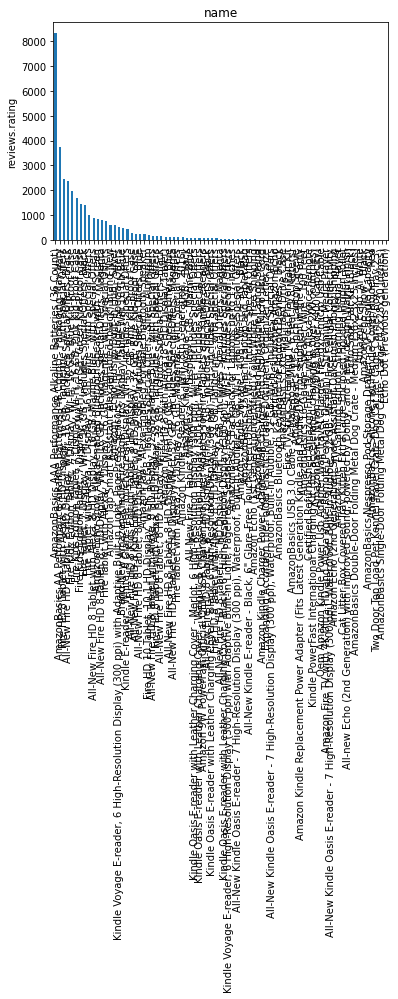

In [44]:
fig = data['name'].value_counts().plot.bar()
fig.set_title('name')
fig.set_ylabel ('reviews.rating')

In [45]:
data['name'].value_counts()

AmazonBasics AAA Performance Alkaline Batteries (36 Count)                               8343
AmazonBasics AA Performance Alkaline Batteries (48 Count) - Packaging May Vary           3728
Fire HD 8 Tablet with Alexa, 8 HD Display, 16 GB, Tangerine - with Special Offers        2443
All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 16 GB - Includes Special Offers, Black    2370
Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16 GB, Blue Kid-Proof Case                   1986
                                                                                         ... 
AmazonBasics Nespresso Pod Storage Drawer - 50 Capsule Capacity                             1
AmazonBasics Silicone Hot Handle Cover/Holder - Red                                         1
Two Door Top Load Pet Kennel Travel Crate Dog Cat Pet Cage Carrier Box Tray 23"             1
AmazonBasics Single-Door Folding Metal Dog Crate - Large (42x28x30 Inches)                  1
Echo Dot (Previous generation)                              

In [46]:
pd.set_option('display.max_colwidth', -1)
data = data[['name','reviews.text','reviews.title']]
data.head()

name  \
0  Amazon Kindle E-Reader 6" Wifi (8th Generation, 2016)   
1  Amazon Kindle E-Reader 6" Wifi (8th Generation, 2016)   
2  Amazon Kindle E-Reader 6" Wifi (8th Generation, 2016)   
3  Amazon Kindle E-Reader 6" Wifi (8th Generation, 2016)   
4  Amazon Kindle E-Reader 6" Wifi (8th Generation, 2016)   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            reviews.text  \
0  I thought it would be as big as small paper but turn out to be just like my palm. I think it is too small to read on it... not very comfortable as regular Kindle. Would definitely recommend a paperwhite instead.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     
1  This kindle is light and easy to use especially at the beach!!!                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         
2  Didnt know how much i'd use a kindle so went for the lower end. im happy with it, even if its a little dark                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             
3  I am 100 happy with my purchase. I caught it on sale at a really good price. I am normally a real book person, but I have a 1 year old who loves ripping up pages. The Kindle prevents that, it's extremely portable (it fits better in my purse than a giant book), and I have it loaded with lots of books. I finish one and start another, without having to go store. It serves all my needs. I picked this one over the Paperwhite because the price was unbeatable and the only difference that I could see was this one wasn't backlit. A simple book light from the Dollar tree solves that issue. This is my second Kindle (the first being the

In [47]:
data['name'].value_counts()

AmazonBasics AAA Performance Alkaline Batteries (36 Count)                               8343
AmazonBasics AA Performance Alkaline Batteries (48 Count) - Packaging May Vary           3728
Fire HD 8 Tablet with Alexa, 8 HD Display, 16 GB, Tangerine - with Special Offers        2443
All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 16 GB - Includes Special Offers, Black    2370
Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16 GB, Blue Kid-Proof Case                   1986
                                                                                         ... 
AmazonBasics Nespresso Pod Storage Drawer - 50 Capsule Capacity                          1   
AmazonBasics Silicone Hot Handle Cover/Holder - Red                                      1   
Two Door Top Load Pet Kennel Travel Crate Dog Cat Pet Cage Carrier Box Tray 23"          1   
AmazonBasics Single-Door Folding Metal Dog Crate - Large (42x28x30 Inches)               1   
Echo Dot (Previous generation)                              

Define the function to remove punctuation

In [48]:
data['reviews.text'].describe

<bound method NDFrame.describe of 0        I thought it would be as big as small paper but turn out to be just like my palm. I think it is too small to read on it... not very comfortable as regular Kindle. Would definitely recommend a paperwhite instead.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
1        This kindle is light and easy to use especially at the beach!!!                                                                                                                               

In [49]:
def remove_punctuation(text):
    punctuationfree = "". join([i for i in text if i not in string.punctuation])
    return punctuationfree
data['clean_msg'] = data['reviews.text'].apply(lambda x:remove_punctuation(x))
data.head()
    

name  \
0  Amazon Kindle E-Reader 6" Wifi (8th Generation, 2016)   
1  Amazon Kindle E-Reader 6" Wifi (8th Generation, 2016)   
2  Amazon Kindle E-Reader 6" Wifi (8th Generation, 2016)   
3  Amazon Kindle E-Reader 6" Wifi (8th Generation, 2016)   
4  Amazon Kindle E-Reader 6" Wifi (8th Generation, 2016)   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            reviews.text  \
0  I thought it would be as big as small paper but turn out to be just like my palm. I think it is too small to read on it... not very comfortable as regular Kindle. Would definitely recommend a paperwhite instead.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     
1  This kindle is light and easy to use especially at the beach!!!                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         
2  Didnt know how much i'd use a kindle so went for the lower end. im happy with it, even if its a little dark                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             
3  I am 100 happy with my purchase. I caught it on sale at a really good price. I am normally a real book person, but I have a 1 year old who loves ripping up pages. The Kindle prevents that, it's extremely portable (it fits better in my purse than a giant book), and I have it loaded with lots of books. I finish one and start another, without having to go store. It serves all my needs. I picked this one over the Paperwhite because the price was unbeatable and the only difference that I could see was this one wasn't backlit. A simple book light from the Dollar tree solves that issue. This is my second Kindle (the first being the

In [50]:
data['msg_lower'] = data['clean_msg'].apply(lambda x: x.lower())
data.head()

name  \
0  Amazon Kindle E-Reader 6" Wifi (8th Generation, 2016)   
1  Amazon Kindle E-Reader 6" Wifi (8th Generation, 2016)   
2  Amazon Kindle E-Reader 6" Wifi (8th Generation, 2016)   
3  Amazon Kindle E-Reader 6" Wifi (8th Generation, 2016)   
4  Amazon Kindle E-Reader 6" Wifi (8th Generation, 2016)   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            reviews.text  \
0  I thought it would be as big as small paper but turn out to be just like my palm. I think it is too small to read on it... not very comfortable as regular Kindle. Would definitely recommend a paperwhite instead.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     
1  This kindle is light and easy to use especially at the beach!!!                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         
2  Didnt know how much i'd use a kindle so went for the lower end. im happy with it, even if its a little dark                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             
3  I am 100 happy with my purchase. I caught it on sale at a really good price. I am normally a real book person, but I have a 1 year old who loves ripping up pages. The Kindle prevents that, it's extremely portable (it fits better in my purse than a giant book), and I have it loaded with lots of books. I finish one and start another, without having to go store. It serves all my needs. I picked this one over the Paperwhite because the price was unbeatable and the only difference that I could see was this one wasn't backlit. A simple book light from the Dollar tree solves that issue. This is my second Kindle (the first being the

Defining function for Tokenization

In [51]:
def tokenization(text):
    tokens = re.split('\W+',text)
    return tokens
data['msg_token']= data['msg_lower'].apply(lambda x: tokenization(x))
data.head(10)

name  \
0  Amazon Kindle E-Reader 6" Wifi (8th Generation, 2016)   
1  Amazon Kindle E-Reader 6" Wifi (8th Generation, 2016)   
2  Amazon Kindle E-Reader 6" Wifi (8th Generation, 2016)   
3  Amazon Kindle E-Reader 6" Wifi (8th Generation, 2016)   
4  Amazon Kindle E-Reader 6" Wifi (8th Generation, 2016)   
5  Amazon Kindle E-Reader 6" Wifi (8th Generation, 2016)   
6  Amazon Kindle E-Reader 6" Wifi (8th Generation, 2016)   
7  Amazon Kindle E-Reader 6" Wifi (8th Generation, 2016)   
8  Amazon Kindle E-Reader 6" Wifi (8th Generation, 2016)   
9  Amazon Kindle E-Reader 6" Wifi (8th Generation, 2016)   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            reviews.text  \
0  I thought it would be as big as small paper but turn out to be just like my palm. I think it is too small to read on it... not very comfortable as regular Kindle. Would definitely recommend a paperwhite instead.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     
1  This kindle is light and easy to use especially at the beach!!!                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         
2  Didnt know how much i'd use a kindle so went for the lower end. im happy with it, even if its a little dark                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             
3  I am 100 happy with my purchase. I caught it on sale at a really good price. I am normally a real book person, but I have a 1 year old who loves ripping up pages. The Kindle prevents that, it's extremely portable (it fits better in my purse than a giant book), and I have it loaded with lots of books. I finish one and start another

In [52]:
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords = nltk.corpus.stopwords.words('english')
def remove_stopwords(text):
    output= [i for i in text if i not in stopwords]
    return output
data['no_stopwords']= data['msg_token'].apply(lambda x:remove_stopwords(x))
data.head()

[nltk_data] Downloading package stopwords to /home/maruf/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


name  \
0  Amazon Kindle E-Reader 6" Wifi (8th Generation, 2016)   
1  Amazon Kindle E-Reader 6" Wifi (8th Generation, 2016)   
2  Amazon Kindle E-Reader 6" Wifi (8th Generation, 2016)   
3  Amazon Kindle E-Reader 6" Wifi (8th Generation, 2016)   
4  Amazon Kindle E-Reader 6" Wifi (8th Generation, 2016)   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            reviews.text  \
0  I thought it would be as big as small paper but turn out to be just like my palm. I think it is too small to read on it... not very comfortable as regular Kindle. Would definitely recommend a paperwhite instead.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     
1  This kindle is light and easy to use especially at the beach!!!                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         
2  Didnt know how much i'd use a kindle so went for the lower end. im happy with it, even if its a little dark                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             
3  I am 100 happy with my purchase. I caught it on sale at a really good price. I am normally a real book person, but I have a 1 year old who loves ripping up pages. The Kindle prevents that, it's extremely portable (it fits better in my purse than a giant book), and I have it loaded with lots of books. I finish one and start another, without having to go store. It serves all my needs. I picked this one over the Paperwhite because the price was unbeatable and the only difference that I could see was this one wasn't backlit. A simple book light from the Dollar tree solves that issue. This is my second Kindle (the first being the

In [53]:
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
#defining the object for Lemmatization
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatizer(text):
    lemm_text = [wordnet_lemmatizer.lemmatize(word) for word in text]
    return lemm_text
data['msg_lemmatized']=data['no_stopwords'].apply(lambda x:lemmatizer(x))


[nltk_data] Downloading package wordnet to /home/maruf/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [54]:
data.head()

name  \
0  Amazon Kindle E-Reader 6" Wifi (8th Generation, 2016)   
1  Amazon Kindle E-Reader 6" Wifi (8th Generation, 2016)   
2  Amazon Kindle E-Reader 6" Wifi (8th Generation, 2016)   
3  Amazon Kindle E-Reader 6" Wifi (8th Generation, 2016)   
4  Amazon Kindle E-Reader 6" Wifi (8th Generation, 2016)   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            reviews.text  \
0  I thought it would be as big as small paper but turn out to be just like my palm. I think it is too small to read on it... not very comfortable as regular Kindle. Would definitely recommend a paperwhite instead.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     
1  This kindle is light and easy to use especially at the beach!!!                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         
2  Didnt know how much i'd use a kindle so went for the lower end. im happy with it, even if its a little dark                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             
3  I am 100 happy with my purchase. I caught it on sale at a really good price. I am normally a real book person, but I have a 1 year old who loves ripping up pages. The Kindle prevents that, it's extremely portable (it fits better in my purse than a giant book), and I have it loaded with lots of books. I finish one and start another, without having to go store. It serves all my needs. I picked this one over the Paperwhite because the price was unbeatable and the only difference that I could see was this one wasn't backlit. A simple book light from the Dollar tree solves that issue. This is my second Kindle (the first being the